<a href="https://colab.research.google.com/github/tmor8832/JHub-Python/blob/master/Tweet_Coordinates_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This code will extract tweets from a user for analysis. Initial rough guide was followed from youtube https://www.youtube.com/watch?v=ujId4ipkBio
#With significant editing

In [ ]:
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-l78bqgcu
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-l78bqgcu
     |████████████████████████████████| 15.4 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 11.5 MB/s 
  Created wheel for geopandas: filename=geopandas-0.10.2+12.g4361c30-py2.py3-none-any.whl size=1031759 sha256=717203260856ec190d4ef45cc10cedb4928a46f3250a389f94e3753065302f57
  Stored in directory: /tmp/pip-ephem-wheel-cache-x3tamrsu/wheels/cf/3e/0b/6475054094c2b1ea054158ac1fdcf749fb92f5b512377e4cf8
Successfully built geopandas


In [55]:
#import the relevant libraries
# guidance for geopandas in this video https://www.youtube.com/watch?v=5G-1k4CNChI
import tweepy #used to access twitter API
from textblob import TextBlob #used for common NLP tasks and analysis
from wordcloud import WordCloud #for generating a wordcloud image
import pandas as pd #used for creating dataframes
import numpy as np #arrays etc
import seaborn as sns #graphical library
import itertools #
import collections
import re 
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd 
import plotly.express as px



In [ ]:
from google.colab import files
files.upload()

Saving login.csv to login.csv


{'login.csv': b"key\r\ne1skulGTffD4riROKn5n5RFUk\r\njdeWlPuH49YR1MZLP4mhWDSO29sKbubz3UGKnoDZs0hX6pamU4\r\n1280139097068183552-hIOsTeLEU9iX6iXqI1EWLvrhjCgpIW'\r\n1280139097068183552-hIOsTeLEU9iX6iXqI1EWLvrhjCgpIW\r\nln0YCbQgntyEx41eqfh20v2n5a5KsIu4cFVgeBsgRBQi1"}

In [56]:
#Extract the data from the CSV file and store as variables
log = pd.read_csv('login.csv')
ConsumerKey = log['key'][0]
ConsumerKeySecret = log['key'][1]
AccessToken = log['key'][3]
AccessTokenSecret = log['key'][4]

In [57]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(ConsumerKey, ConsumerKeySecret)
authenticate.set_access_token(AccessToken, AccessTokenSecret)
api = tweepy.API(authenticate) #wait_on_rate_limit= True)

In [ ]:
# tweets = api.user_timeline( #username here for the user you want to analyse
#                           screen_name='POTUS', 
#                            # 200 is the maximum allowed count
#                            count=200,
#                            include_rts = False,
#                            # Necessary to keep full_text 
#                            # otherwise only the first 140 words are extracted
#                            tweet_mode = 'extended'
                           
# tweet_info = []

# for info in tweets:
#      txt = info.full_text
#      tweet_info.append(txt)

# df = pd.DataFrame(tweet_info, columns =['Tweets'])
# df.head()

SyntaxError: ignored

In [58]:
#Gather 2000 tweets on Bitcoin and filter out any retweets
search_term = '#Bitcoin -filter:retweets'
#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang = 'en', since='2021-11-20').items(10) #for 2000 tweets
tweet_loc = tweepy.Cursor(api.search, q=search_term, lang = 'en', since='2021-11-20').items(10)
tweet_coordinates = tweepy.Cursor(api.search, q=search_term, lang = 'en', since='2021-11-20').items(10)

#store the tweets in a variable
all_tweets = [tweet.text for tweet in tweets]
users_locs = [tweet.user.location for tweet in tweet_loc]
coordinates = [tweet.coordinates for tweet in tweet_coordinates]

print(coordinates)

combined_information = {'Tweets': all_tweets, 'Location': users_locs, 'Coordinates': coordinates }

df = pd.DataFrame(combined_information)

df.head()

TweepError: ignored

In [59]:
search_words = "#coronavirus OR #covid19 OR #lockdown"
tweets = tweepy.Cursor(api.search, q = search_words, lang ='en', geocode='51.507218,-0.127586,100km').items(500)
#make sure there are no spaces between the long and lat and take geocode from
#https://developers.google.com/maps/documentation/geocoding/overview#place-id
tweet_coordinates = tweepy.Cursor(api.search, q = search_words, lang ='en', geocode='51.507218,-0.127586,100km').items(500)
coordinates = []
for tweet in tweet_coordinates:
  if str(tweet.coordinates) != 'None':
    start = tweet.coordinates.index('[')
    end = text.coordinates.index(']',start+1)
    substring = text[start+1:end]
    coo = tweet.coordinates
    coordinates.append(coo)
    print(coo)

df2 = pd.DataFrame(coordinates, columns =['coordinates'])
df2.head()

all_tweets = [tweet.text for tweet in tweets]

df = pd.DataFrame(all_tweets, columns =['Tweets'])
df.head()


{'type': 'Point', 'coordinates': [-0.17988195, 51.562662]}


,Tweets
0,Government restores compulsory use of face mas...
1,"As central Europe starts to recover, still pro..."
2,Fantastic news from #Switzerland which is mirr...
3,#Covid19... it's not going away. Follow govern...
4,funny how this witch @devisridhar supports thi...


In [ ]:
df2.head(500)

,coordinates
0,None
1,None
2,None
3,None
4,None
...,...
495,None
496,None
497,None
498,None


TypeError: ignored

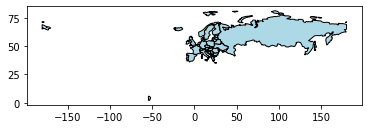

In [60]:
#df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy)
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world_data[world_data.continent == 'Europe'].plot(color = 'lightblue', edgecolor = 'black')
df2.plot(ax=axis, color = 'black')
plt.title('Tweet Map')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12,9)
fig.savefig('matplot.png', dpi = 200)
plt.show()


In [ ]:
#Clean the tweets to remove unwanted characters and data
def cleanTweet (tweet):
  tweet = re.sub('#bitcoin', 'bitcoin', tweet) #Remove hashtag from bitcoin or Bitcoin
  tweet = re.sub('#Bitcoin', 'Bitcoin', tweet)
  tweet = re.sub('#[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('@[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('$[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('[!,*)@#%(&$_?.^]', '', tweet)
  tweet = re.sub('\\n', '', tweet) #removing the '\n' string
  tweet = re.sub('https', '', tweet) #remove any hyperlinks
  tweet = re.sub('http', '', tweet) #remove any hyperlinks
  return tweet

def cleanLoc (user_locs):
  str(user_locs)
  if user_locs != "":
    return user_locs
  else:
    user_locs = 'Unknown'
    return user_locs


In [ ]:
#Call the function and clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTweet)
df.head()

,Tweets
0,has announced that it has postponed indefinit...
1,RTIH rounds up the key related developments ...
2,Nursing unions around world call for UN action...
3,sounds like could have been in Brentwood abo...
4,Rallying call issued for volunteers to help ...


In [ ]:
clean_tweet_list = [cleanTweet(tweet) for tweet in all_tweets]
words_in_tweet = [tweet.lower().split() for tweet in clean_tweet_list]
words_in_tweet[:2]

[['has',
  'announced',
  'that',
  'it',
  'has',
  'postponed',
  'indefinitely',
  'its',
  '12th',
  'ministerial',
  'conference',
  'citing',
  'new',
  'covid-19',
  'tra…',
  '://tco/xxdawcfk4i'],
 ['rtih',
  'rounds',
  'up',
  'the',
  'key',
  'related',
  'developments',
  'from',
  'last',
  'week',
  'including',
  '…',
  '://tco/krof55oe3b']]

In [ ]:
clean_tweet_list = list(itertools.chain(*words_in_tweet))

# Create counter
count = collections.Counter(clean_tweet_list)

count.most_common(15)

[('the', 640),
 ('to', 379),
 ('of', 326),
 ('in', 299),
 ('and', 281),
 ('a', 222),
 ('for', 187),
 ('is', 177),
 ('on', 165),
 ('new', 144),
 ('be', 131),
 ('that', 110),
 ('this', 109),
 ('variant', 107),
 ('from', 106)]

In [ ]:
clean_tweet_list = pd.DataFrame(count.most_common(15),
                             columns=['words', 'count'])

clean_tweet_list.head()

,words,count
0,the,640
1,to,379
2,of,326
3,in,299
4,and,281


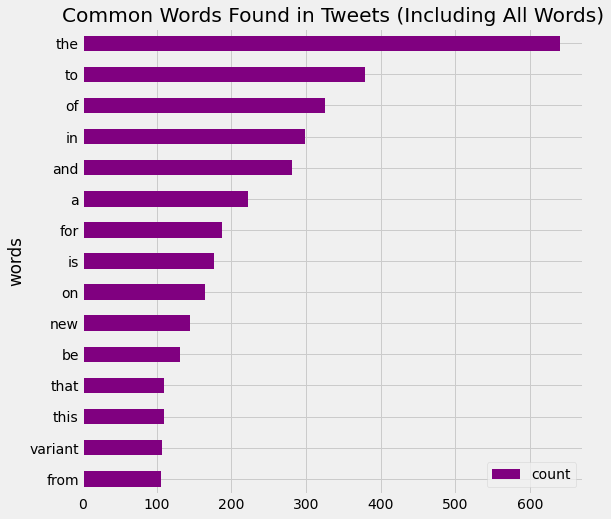

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweet_list.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [ ]:
# # Use of textblob NLTK lib https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
# #create a function to get the subjectivity, values between 0 and 1 where 1 is a high degree of personal opinion and not fact
# def getSubjectivity(tweet):
#   return TextBlob(tweet).sentiment.subjectivity
# #create a function to get the polarity, values bwteen [-1:1] -1 is negative, 1 is a positive sentiment
# def getPolarity(tweet):
#   return TextBlob(tweet).sentiment.polarity 

In [ ]:
# df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
# df['Polarity'] = df['Tweets'].apply(getPolarity)
# df.head(100)

,Tweets,Subjectivity,Polarity
0,Access to quality affordable health care shoul...,0.345238,0.261905
1,At its core Hanukkah recounts a story at the h...,0.380000,0.300000
2,Because of the actions we’ve taken in the past...,0.275926,-0.187037
3,This week we launched a major effort to modera...,0.650000,0.003125
4,Small businesses are the backbone of communiti...,0.550000,-0.175000
...,...,...,...
95,Along with the other plans I am advancing the ...,0.218750,0.093750
96,Let’s lower costs for American families Let’s ...,0.166667,0.166667
97,The bottom line is this: With the bill we pass...,0.610417,0.218750
98,Passing the infrastructure bill was a historic...,0.000000,0.000000


In [ ]:
# #create a function to get the sentiment text
# def getSentiment(score):
#   if score < 0:
#     return 'Negative'
#   elif score == 0:
#     return 'Neutral'
#   else:
#     return 'Positive' 

In [ ]:
# #create a column to store the text sentiment
# df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
# #print positive tweets
# j=1
# sortedDF = df.sort_values(by=['Polarity'])
# for i in range (0, sortedDF.shape[0]):
#   if (sortedDF['Sentiment'][i]=='Positive'):
#     print(str(j) + ')' + sortedDF['Tweets'][i])
#     print()
#     j = j+1



1)If you missed the Bitcoin DIPs I think there is another strategy Buy MSTR and you will own a part of their… ://tco/iPbrHhMcMk

2)🪴💹Grow your NFTs with me🏷️Tag your NFTs📌attach your username or link💬 Put a special comment on that🕊️ Retweet t… ://tco/xsomGYl4yx

3)Microstrategy acquires 7002 more Bitcoins://tco/6yVOEXWiKABitcoin

4)world This project has a lot of traction so hopefully this project will do better in the future and become… ://tco/03xmzKvg13



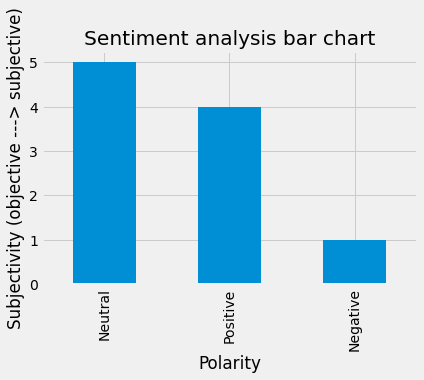

In [ ]:
# df['Sentiment'].value_counts().plot(kind='bar')
# plt.title('Sentiment analysis bar chart')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity (objective ---> subjective)')
# plt.show()


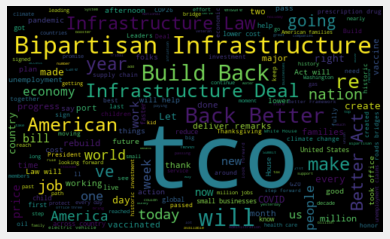

In [ ]:
# #Plot a word cloud
# allWords = ''.join([twts for twts in df['Tweets']])
# wordcloud = WordCloud(width = 500, height = 300, random_state= 21, max_font_size=119).generate(allWords)
# plt.imshow(wordcloud, interpolation= 'bilinear')
# plt.axis('off')
# plt.show()